In [2]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------- 参数设置 -------------------------
species = "Photon"  # 粒子种类
E_J_to_MeV = 1.0 / 1.6e-13  # 能量单位转换 (J → MeV)
step = 10  # 能量bin合并步长
x_range_um = (16, 25)  # 自动识别的 x 区间 (单位：μm)

# ------------------------- 文件路径设置 -------------------------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 34
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ------------------------- 读取数据 -------------------------
distfun_data = sh.getdata(file_path)
sh.list_variables(distfun_data)

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Photon_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Photon_mid <class

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场/distfun0036.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid


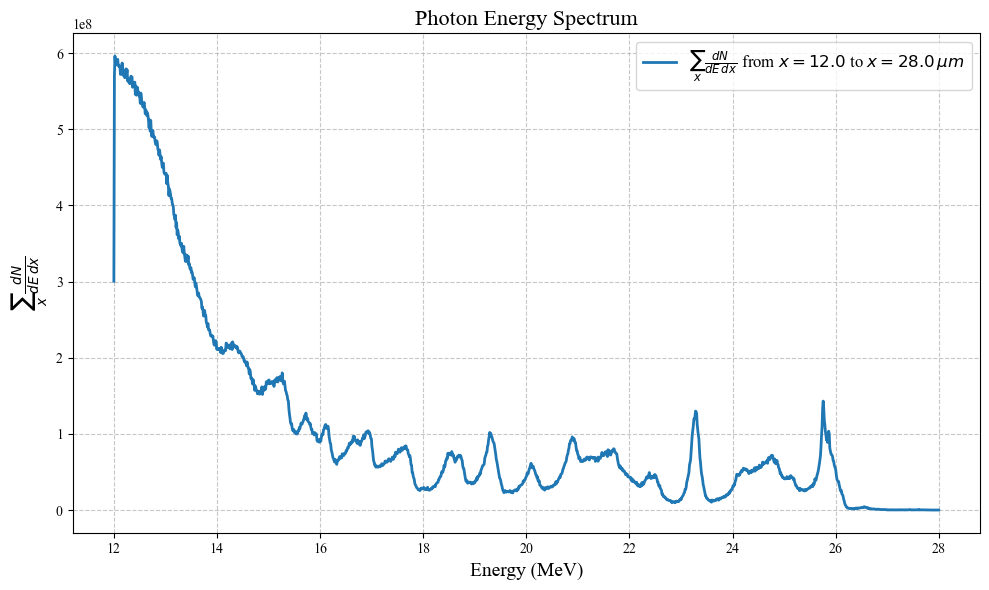

In [20]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------- 参数设置 -------------------------
# species = "Photon"  # 粒子种类
species = "Electron"  # 粒子种类
E_J_to_MeV = 1.0 / 1.6e-13  # 能量单位转换 (J → MeV)
x_range_um = (5, 30)  # 自动识别的 x 区间 (单位：μm)

# ------------------------- 文件路径设置 -------------------------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 36
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ------------------------- 读取数据 -------------------------
distfun_data = sh.getdata(file_path)
x = getattr(distfun_data, f'Grid_x_px_{species}').data[0] / 1e-6  # 转为 μm
px = getattr(distfun_data, f'Grid_x_px_{species}').data[1] #* E_J_to_MeV
N = getattr(distfun_data, f'dist_fn_x_px_{species}').data

# ------------------------- 区间提取与 bin 合并 -------------------------
# 自动识别 x 区间索引
x_min, x_max = x_range_um
mask = (x >= x_min) & (x <= x_max)
x_selected = x[mask]

# # 裁剪能量轴以适应 step 合并
# length = len(px)
# cut_len = length - (length % step)
# px = px[:cut_len]
# N = N[:, :cut_len]

dpx = np.mean(np.diff(px)) #* step
dx = np.mean(np.diff(x))

# # 合并能量 bin（按列方向）
# N_reshaped = N[:, :cut_len].reshape(N.shape[0], -1, step)  # 增加一个维度按照step进行组合
# N_binned = np.sum(N_reshaped, axis=2)                      # 分组后进行求合
# en_binned = px[:cut_len].reshape(-1, step).mean(axis=1)# 列数对应的是能量，即数量累加后后需要求出能量均值，能量才能对应上数量

# ------------------------- 计算 dN/dE dx 并积分 -------------------------
dN_dEdx = N / (dpx * dx)
dN_dEdx_sum = np.sum(N[mask, :], axis=1)

# ------------------------- 绘图 -------------------------
plt.figure(figsize=(10, 6))
label_str = fr'$\sum_x \frac{{dN}}{{dE\,dx}}$ from $x={x_selected.min():.1f}$ to $x={x_selected.max():.1f}\,\mu m$'
plt.plot(x_selected, dN_dEdx_sum, label=label_str, linewidth=2)
plt.legend(fontsize=12)
plt.title('Photon Energy Spectrum', fontsize=16)
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/distfun0036.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid


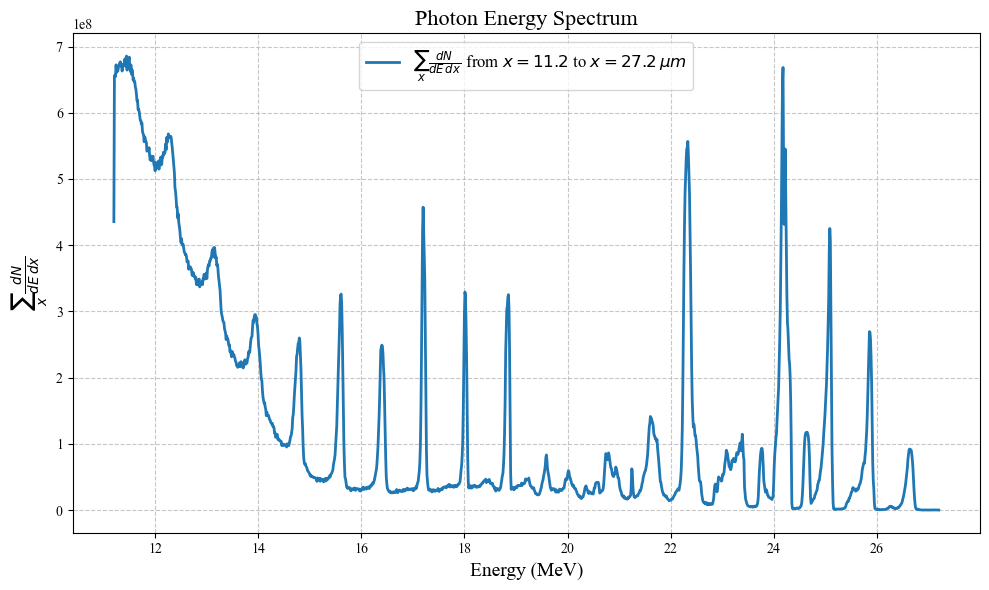

In [19]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------- 参数设置 -------------------------
# species = "Photon"  # 粒子种类
species = "Electron"  # 粒子种类
E_J_to_MeV = 1.0 / 1.6e-13  # 能量单位转换 (J → MeV)
x_range_um = (10, 30)  # 自动识别的 x 区间 (单位：μm)

# ------------------------- 文件路径设置 -------------------------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 36
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ------------------------- 读取数据 -------------------------
distfun_data = sh.getdata(file_path)
x = getattr(distfun_data, f'Grid_x_px_{species}').data[0] / 1e-6  # 转为 μm
px = getattr(distfun_data, f'Grid_x_px_{species}').data[1] #* E_J_to_MeV
N = getattr(distfun_data, f'dist_fn_x_px_{species}').data

# ------------------------- 区间提取与 bin 合并 -------------------------
# 自动识别 x 区间索引
x_min, x_max = x_range_um
mask = (x >= x_min) & (x <= x_max)
x_selected = x[mask]

# # 裁剪能量轴以适应 step 合并
# length = len(px)
# cut_len = length - (length % step)
# px = px[:cut_len]
# N = N[:, :cut_len]

dpx = np.mean(np.diff(px)) #* step
dx = np.mean(np.diff(x))

# # 合并能量 bin（按列方向）
# N_reshaped = N[:, :cut_len].reshape(N.shape[0], -1, step)  # 增加一个维度按照step进行组合
# N_binned = np.sum(N_reshaped, axis=2)                      # 分组后进行求合
# en_binned = px[:cut_len].reshape(-1, step).mean(axis=1)# 列数对应的是能量，即数量累加后后需要求出能量均值，能量才能对应上数量

# ------------------------- 计算 dN/dE dx 并积分 -------------------------
dN_dEdx = N / (dpx * dx)
dN_dEdx_sum = np.sum(N[mask, :], axis=1)

# ------------------------- 绘图 -------------------------
plt.figure(figsize=(10, 6))
label_str = fr'$\sum_x \frac{{dN}}{{dE\,dx}}$ from $x={x_selected.min():.1f}$ to $x={x_selected.max():.1f}\,\mu m$'
plt.plot(x_selected, dN_dEdx_sum, label=label_str, linewidth=2)
plt.legend(fontsize=12)
plt.title('Photon Energy Spectrum', fontsize=16)
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()